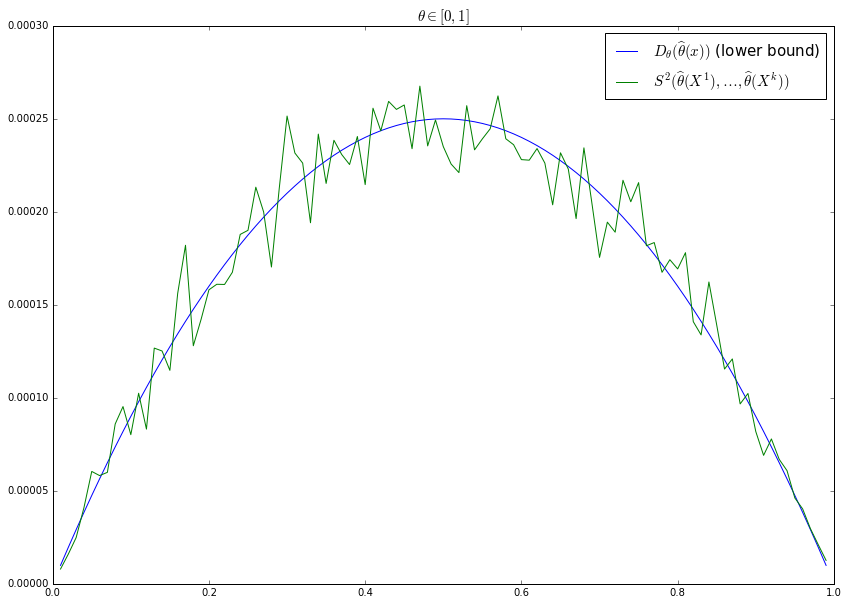

In [15]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
from scipy.stats import bernoulli

def init_graph():
    plt.figure(figsize = (14, 10))
    plt.title("$\\theta \\in [0,1]$", fontsize=15)
    

def fisher_information(theta):
    return 1 / ((1 - theta) * theta)


def variance_lower_bound(theta):
    # tau = theta
    return 1 / (N * fisher_information(theta))


N = 1000
K = 500

# variance lower bound
thetas = np.arange(0.01, 1, 0.01)
init_graph()
plt.plot(thetas, variance_lower_bound(thetas), label='$D_\\theta (\\widehat{\\theta}(x))$ (lower bound)')

# bootstrap estimations
bootstrap = []
for theta in thetas:
    # generate samples from bernoulli distribution
    x = bernoulli.rvs(theta, size=N)
    bootstrap.append(np.var([i.mean() for i in 
                                   [bernoulli.rvs(x.mean(), size=N) for _ in range(K)]]))

plt.plot(thetas, bootstrap, label='$S^2(\\widehat{\\theta}(X^1), \\dots, \\widehat{\\theta}(X^k))$')

plt.legend(fontsize=15)
plt.show()